In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
#generate data
features, true_labels = make_blobs (
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [6]:
features[:5] #last 5 elements

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [7]:
true_labels[:5] #last 5 elements

array([1, 0, 2, 2, 2])

In [8]:
#scale different units
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
scaled_features[:5] #last 5 elements

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [12]:
kmeans = KMeans (
    init="random", #initialization technique
    n_clusters=3,  #sets k for clustering step
    n_init=10,     #number of inilization to perform
    max_iter=300,  #max number of iter
    random_state=42
)

In [13]:
# masukin data ke kmean
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [14]:
# lowest SSE value
kmeans.inertia_

74.57960106819854

In [15]:
# final lcoations of centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [16]:
# nuber of iteration to converge
kmeans.n_iter_

6

In [17]:
# cluster assignments store in 1-dimensional numpy array
kmeans.labels_[:5]

array([0, 1, 2, 2, 2])

In [20]:
# elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# stores SSE values for each iteration (k)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# python unpacking
# https://realpython.com/iterate-through-dictionary-python/#using-the-dictionary-unpacking-operator

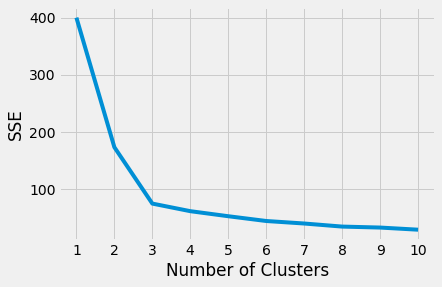

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()